
  
# **"Pistachio Data Analysis By Machine Learning Models"**

#1.Project Objective:

The primary goal of this project is to develop an accurate and robust classification system to distinguish between two types of pistachios — Kirmizi Pistachio and Siit Pistachio — using their morphological (shape-related) features.


This involves:


--->Exploring and analyzing the dataset.

--->Applying and comparing multiple machine learning models.

--->Evaluating the performance of these models using accuracy, confusion matrices, and ROC-AUC scores.

--->Visualizing insights and patterns in the dataset.


#2. Specific Objectives:


--->Prepare the Data Clean the dataset and convert labels into numerical form.


--->Explore the Data Visualize feature relationships and check for class balance.


--->Process Features Scale numerical features and handle any skewness.


--->Build Models Train 8 ML models including SVM, Random Forest, and XGBoost.


--->Evaluate Models Use accuracy, confusion matrix, and ROC-AUC to assess performance.


--->Compare Models Identify the best-performing model for classification.


--->Conclude the Study Summarize results and give final recommendations.



1. Importing Libraries and Data






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/pistachio.csv")
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


2. Data Preview

               head(): to print top 5 columns in the dataset

               tail(): to print last 5 columns in the dataset

In [ ]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [ ]:
df.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
1713,65570,2071.4451,418.0258,217.1458,0.8545,288.9400,0.8976,73054,0.5945,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849,1441.2590,451.0457,205.2553,0.8905,296.0764,0.9340,73716,0.6459,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270,1370.5380,428.9636,269.8232,0.7774,339.0211,0.9722,92847,0.7400,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148,1309.8430,469.0491,208.3141,0.8960,305.1801,0.9376,78014,0.6341,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio
1717,78780,1324.8831,451.5905,239.3016,0.8481,316.7109,0.9328,84454,0.7021,1.8871,0.5640,0.7013,0.0057,0.0030,0.4919,0.9282,Siit_Pistachio


3 . Dataset Size and Shape
    
        
         size : To print Total number of elements (cells) in the Dataset.

         shape :To print we know how many records (rows) and features (columns) are in your dataset.


In [ ]:
df.size

29206

In [ ]:
df.shape

(1718, 17)

4.Dataset Summary
  
  info()

              To print Data types is (int, float, object, etc.)

  describe()

            To print Count, Mean, Std, Min, Percevtiles(Q1, median, Q3),Max

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [ ]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,79871.952852,1421.797588,446.206444,238.193128,0.840347,317.790000,0.940103,84947.671129,0.716055,1.899342,0.570831,0.712841,0.005704,0.003017,0.510097,0.955185
std,12968.217051,373.408835,31.885328,30.426445,0.049026,26.571699,0.050006,13081.742551,0.052534,0.241253,0.211514,0.044230,0.000810,0.000334,0.063391,0.051735
min,29808.000000,858.363000,321.425500,133.509600,0.504900,194.814600,0.588000,37935.000000,0.427200,1.158500,0.062800,0.476000,0.004000,0.002400,0.226600,0.620400
25%,71898.500000,1169.633225,426.554100,217.875475,0.817500,302.562375,0.920250,76357.750000,0.688100,1.736325,0.372325,0.682000,0.005200,0.002800,0.465125,0.944200
50%,79795.000000,1260.785500,448.453150,235.888750,0.850250,318.744650,0.953800,84973.000000,0.726100,1.899550,0.643850,0.709750,0.005600,0.003000,0.503750,0.972800
75%,88980.000000,1599.479000,467.515200,257.433625,0.875375,336.590000,0.976300,93660.750000,0.753600,2.068575,0.744450,0.741600,0.006100,0.003200,0.549975,0.986800
max,124008.000000,2755.049100,535.642200,383.046100,0.946000,397.356100,0.995100,132478.000000,0.820400,3.085800,0.933600,0.869500,0.013100,0.005300,0.756100,0.999000


5. Missing Values

   isnull()
             To print a DataFrame of the same shape with True for missing (NaN) values and False for non-missing values.

   isnull().sum()
              To print the total count of missing values in each column.


  There is no null values in your DataFrame

In [ ]:
df.isnull()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1714,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1716,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


6. Column Names

In [ ]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

7. Outlier Detection:
         Boxplots were plotted for each numerical column using sns.boxplot() to visually detect outliers.There is outliers in your Dataset.

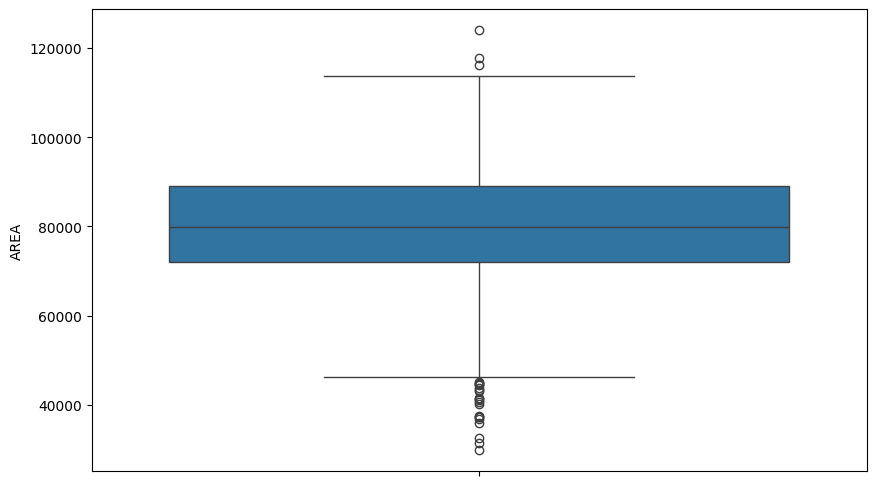

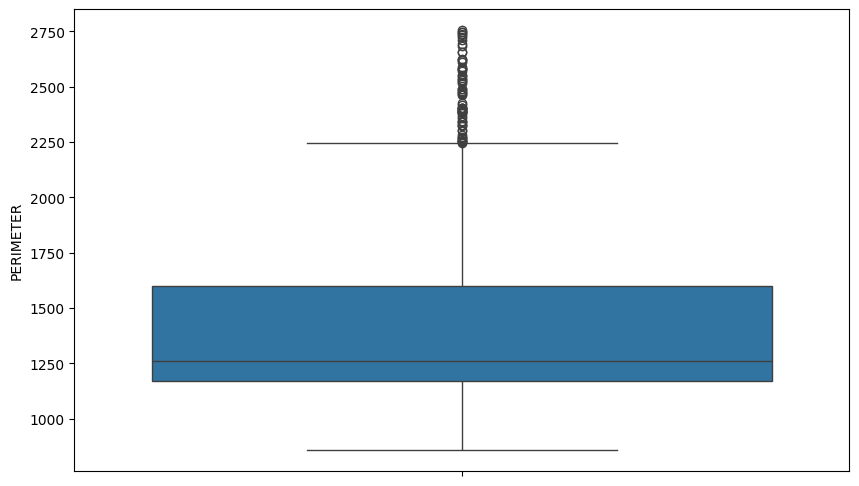

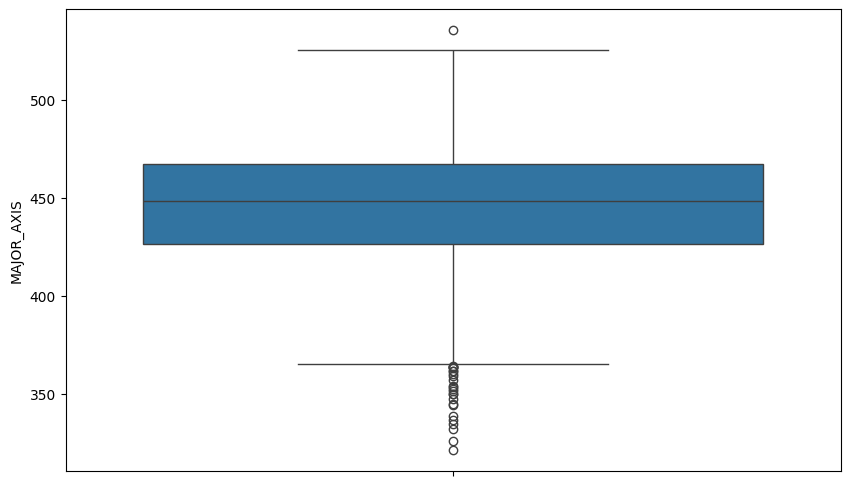

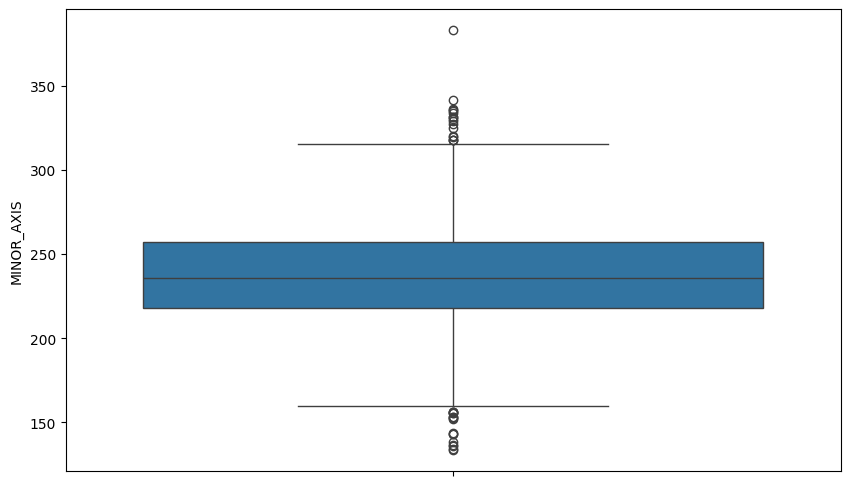

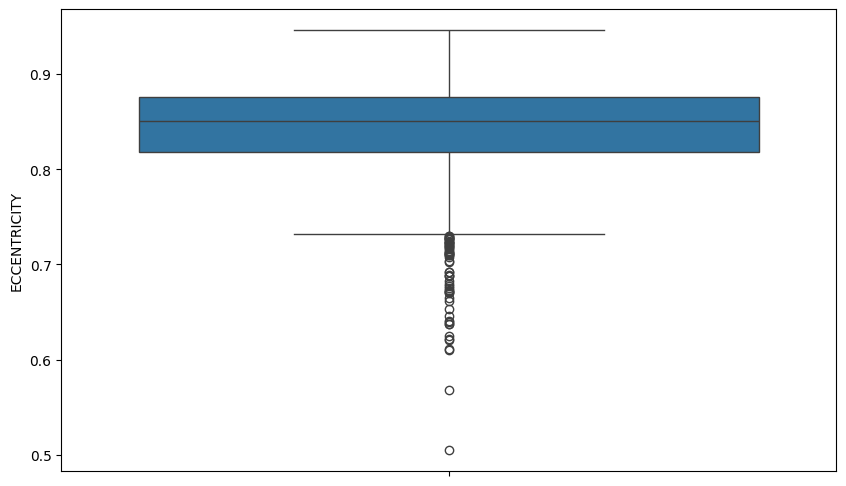

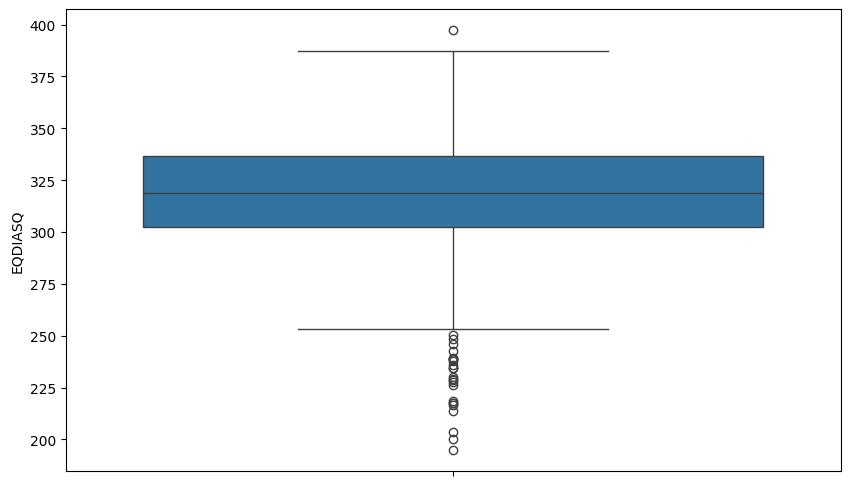

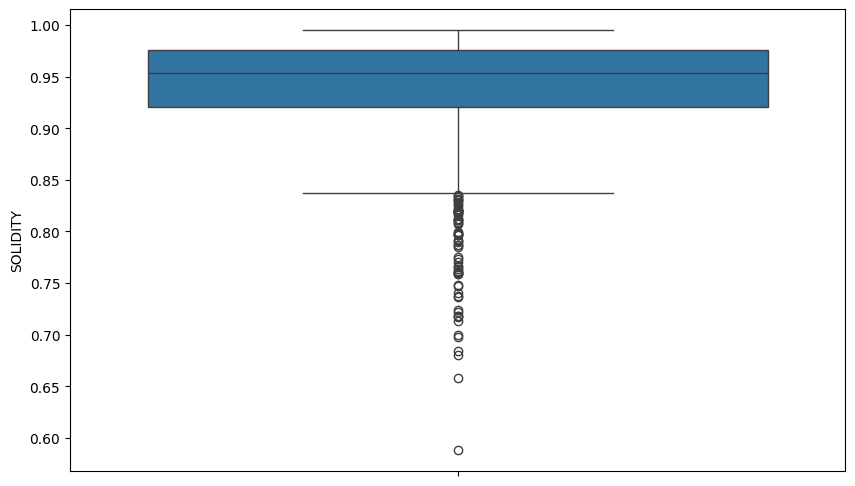

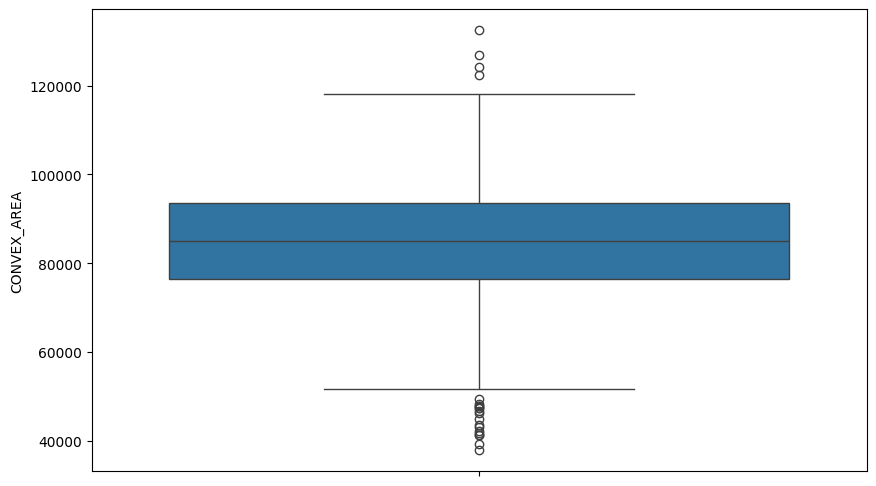

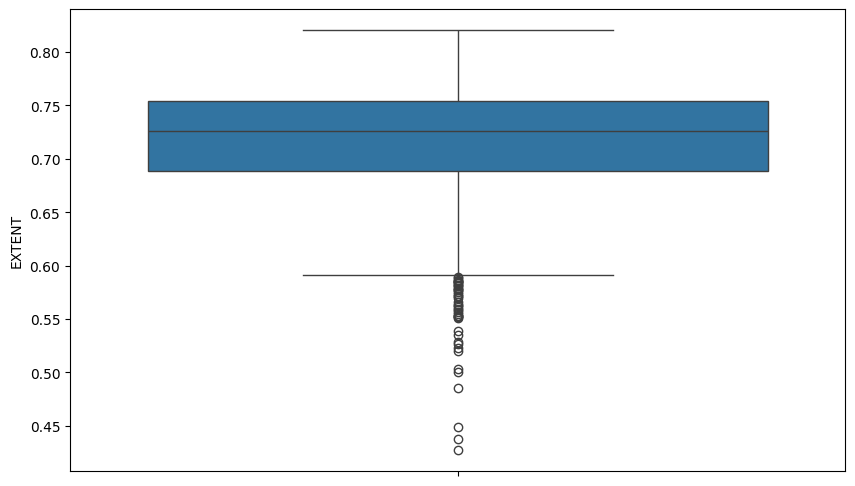

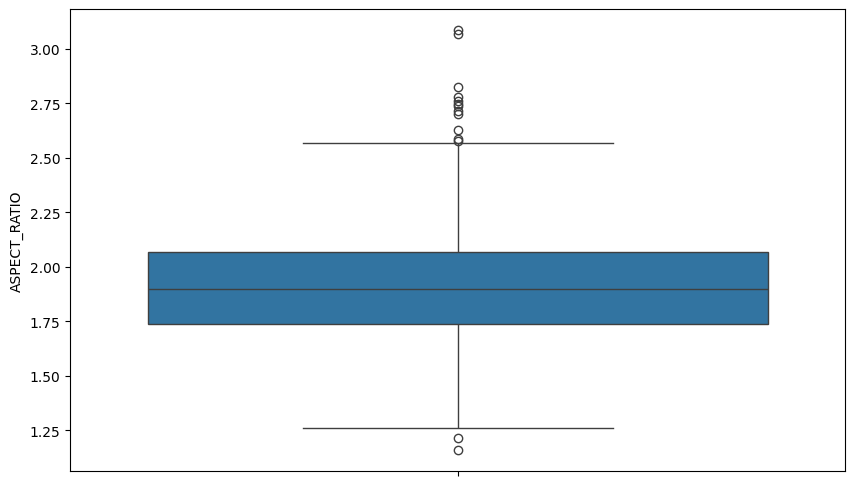

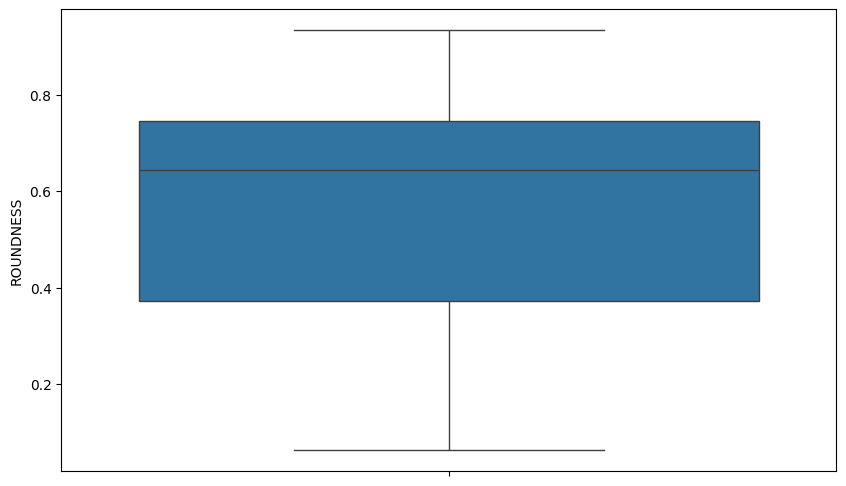

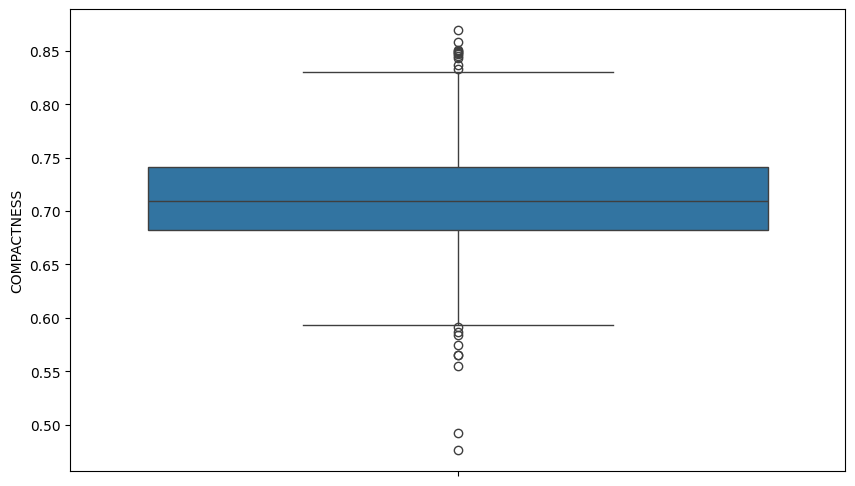

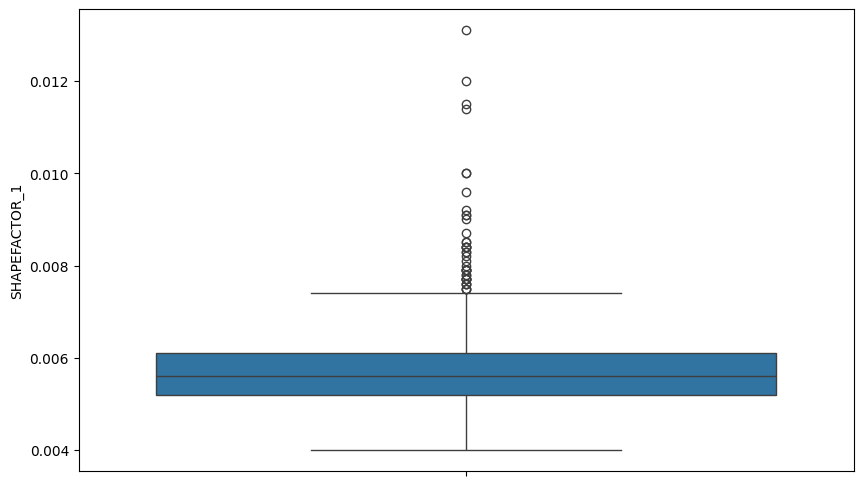

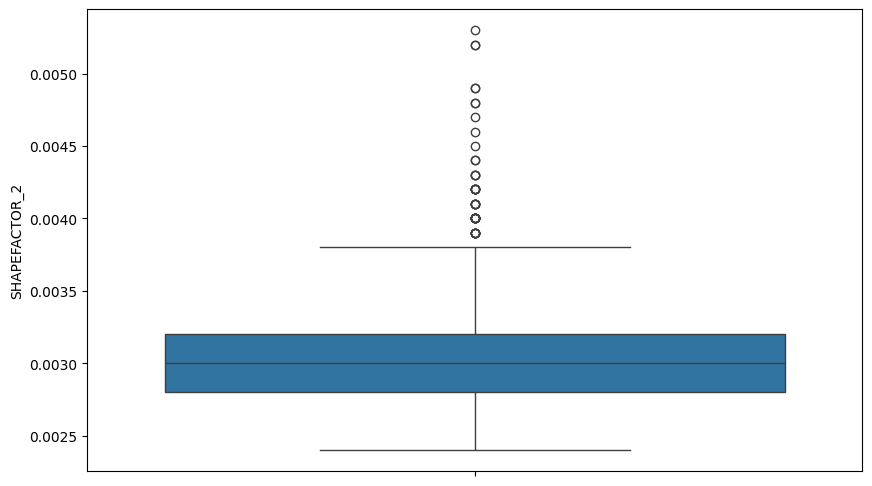

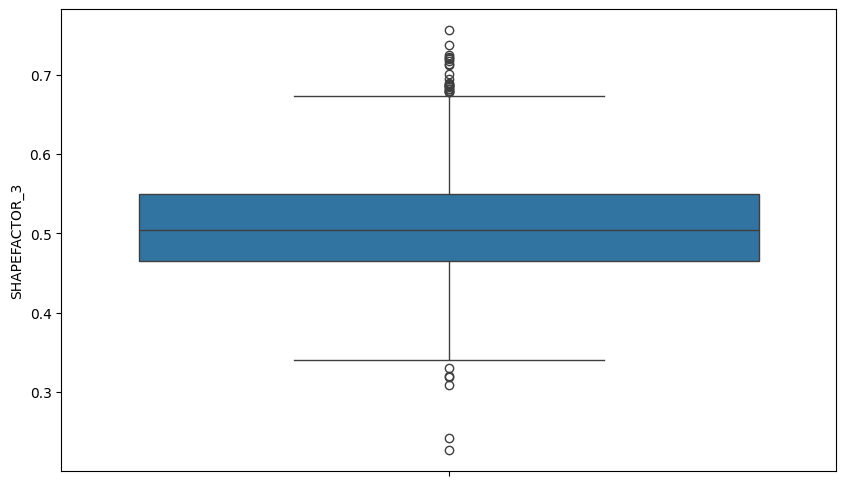

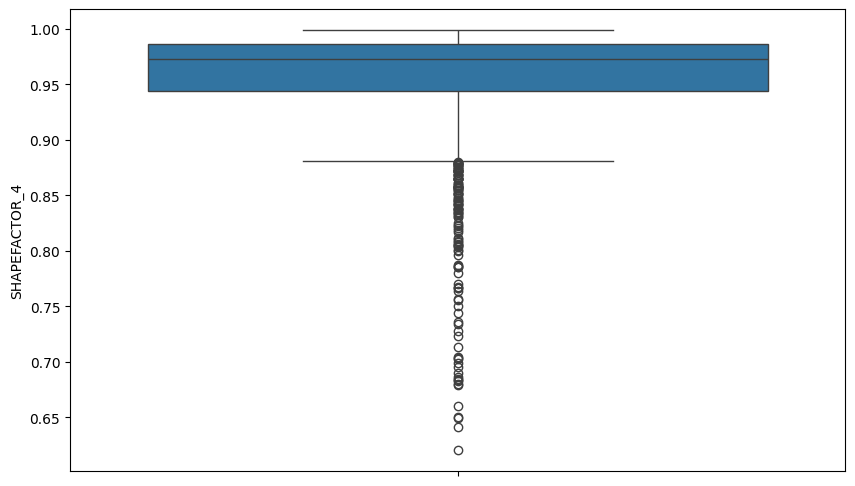

In [ ]:
for column in df.select_dtypes(include=('number')).columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(y=df[column])

In [ ]:
df.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

 8. Outlier Treatment

            We used the IQR method to cap outliers:

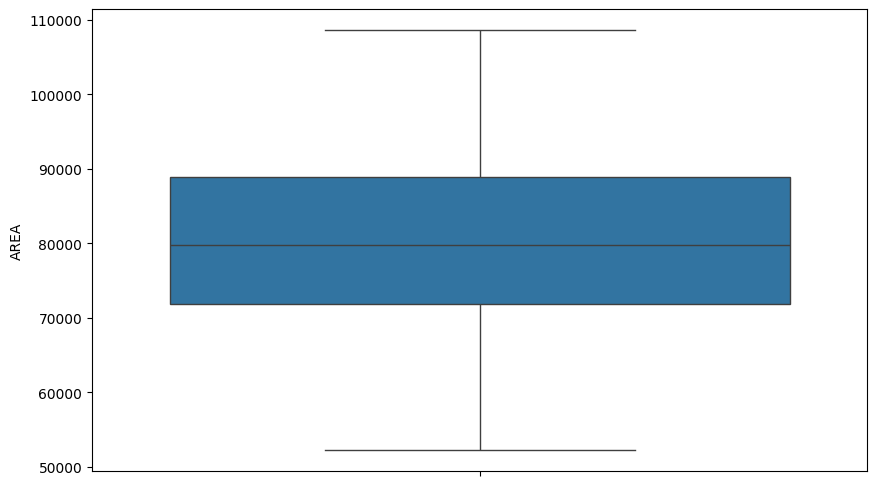

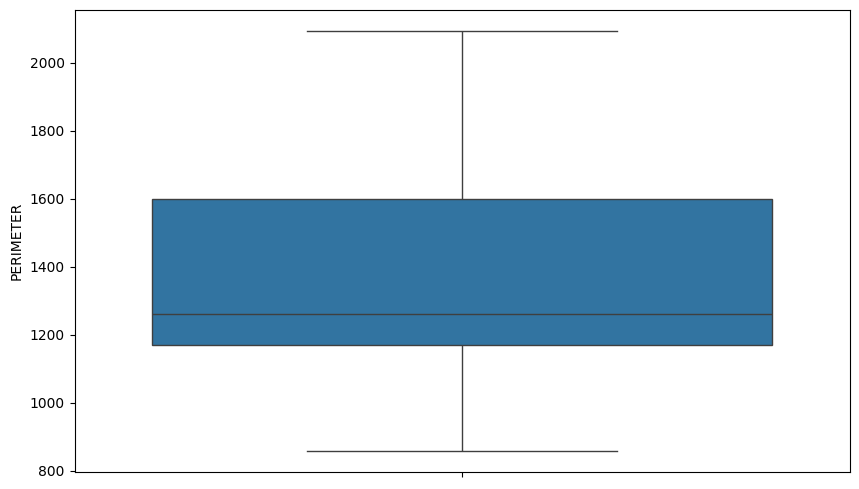

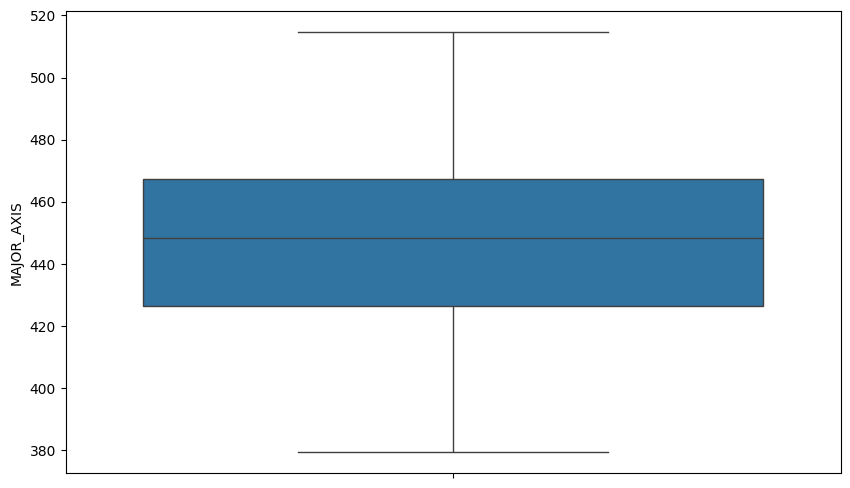

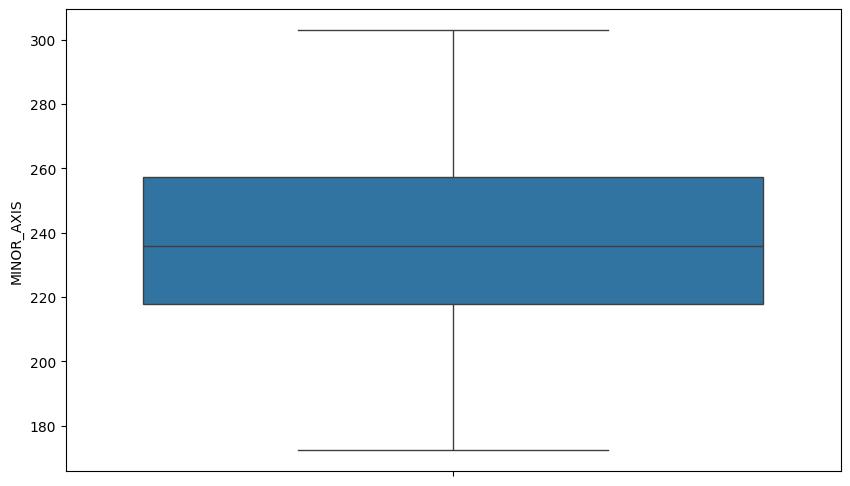

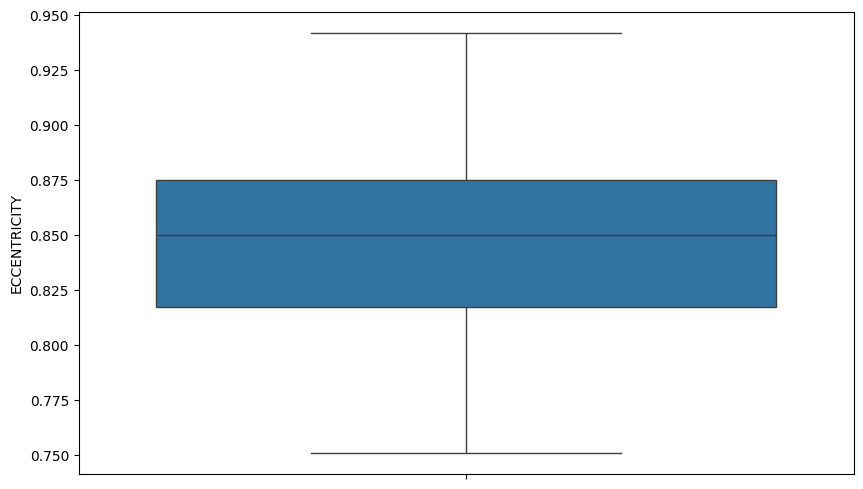

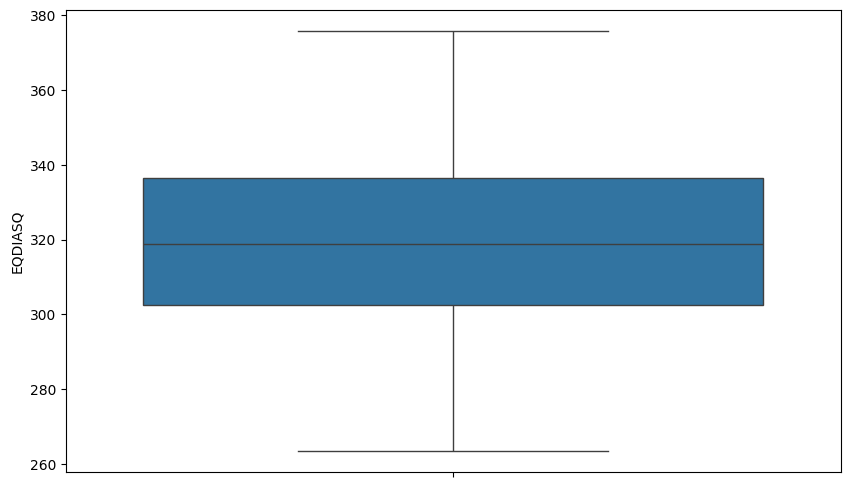

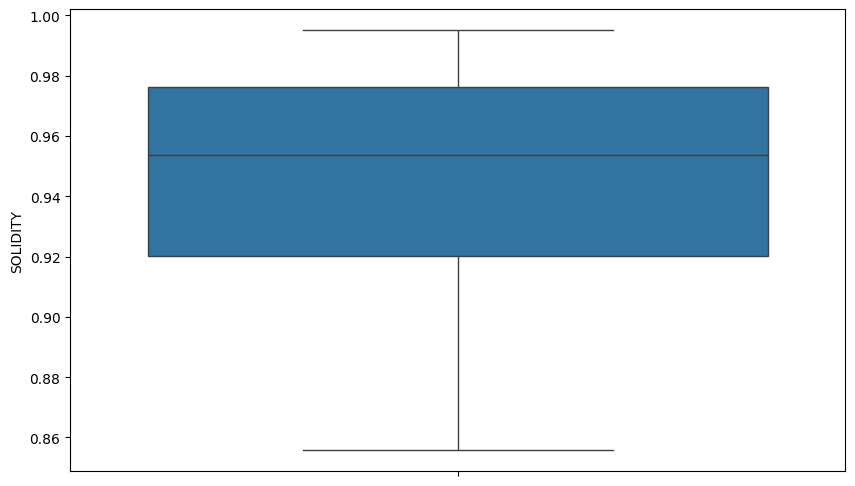

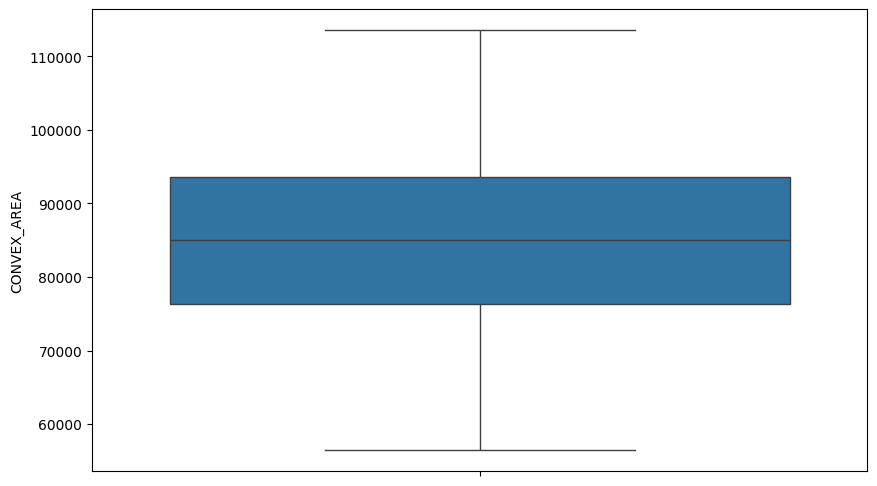

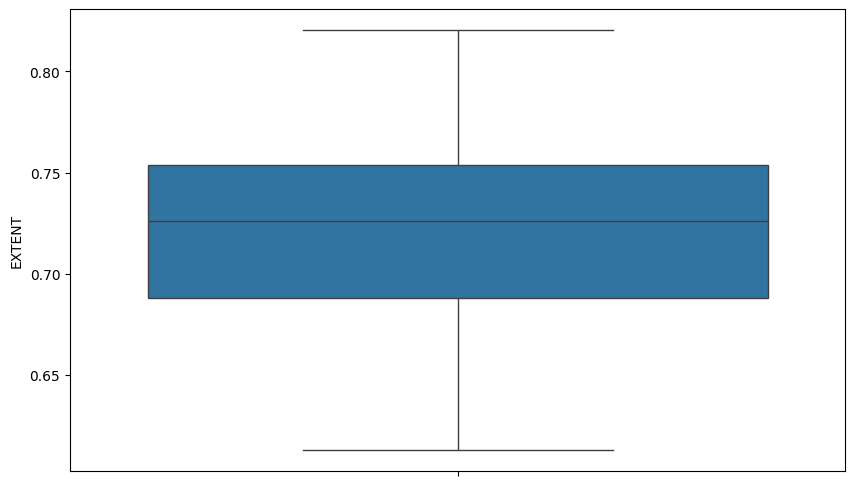

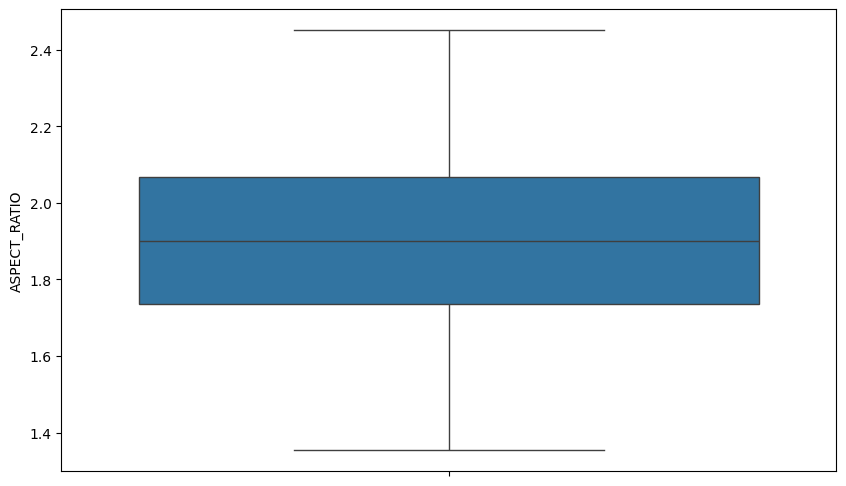

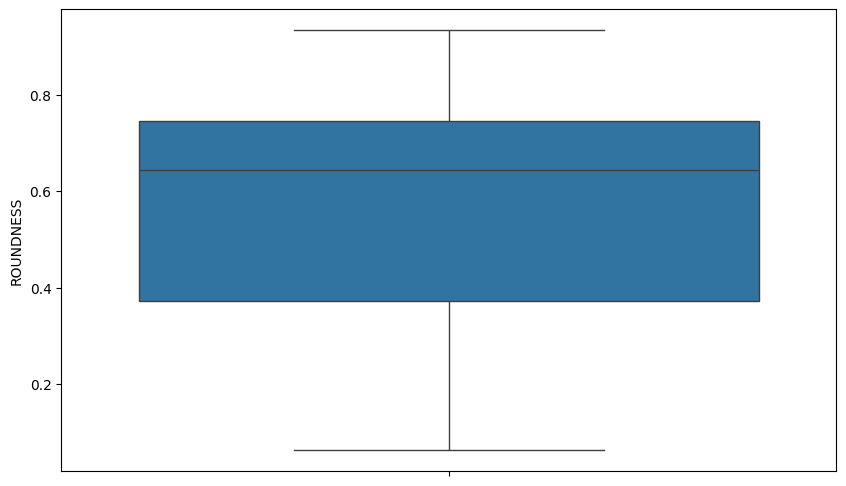

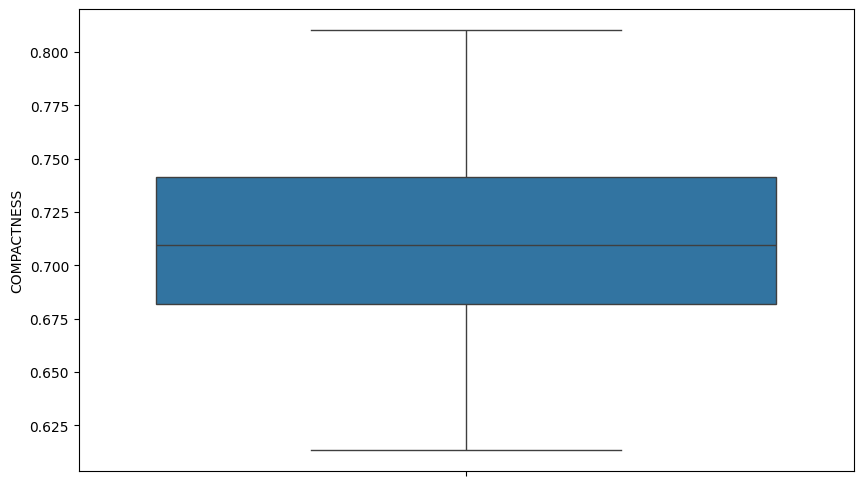

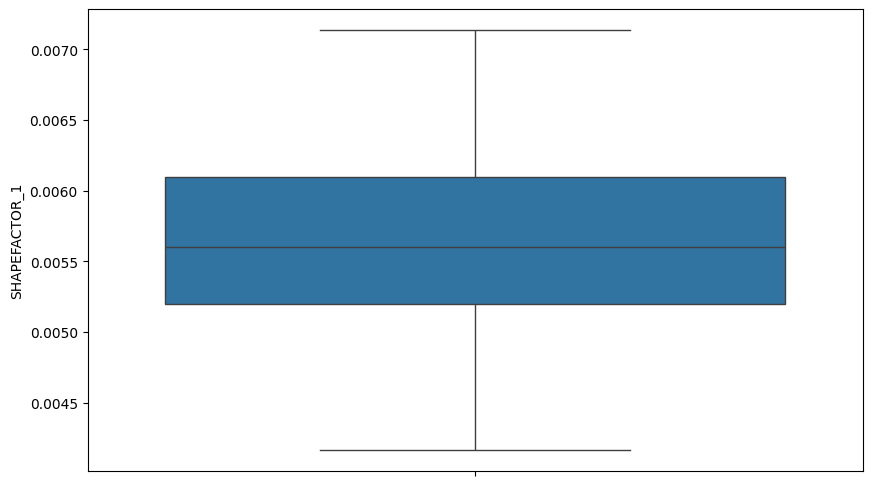

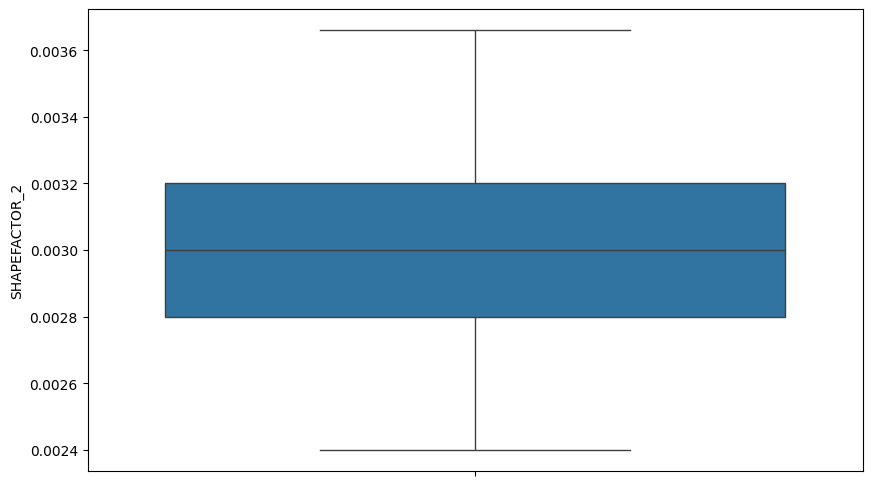

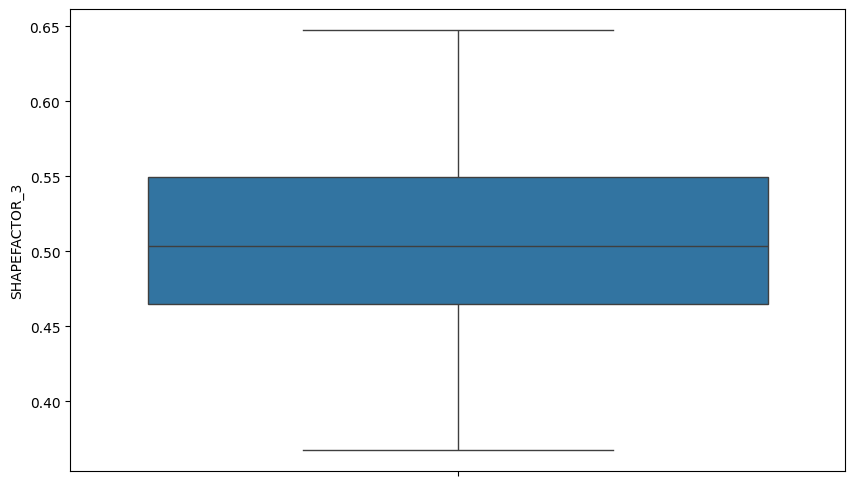

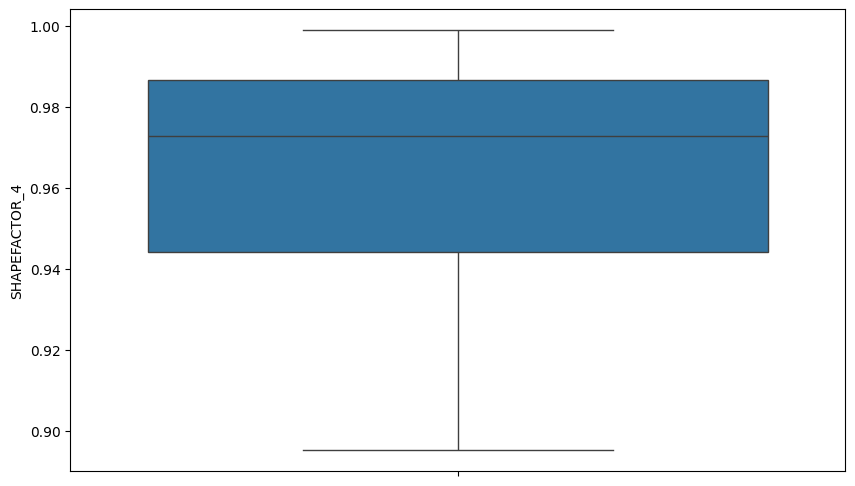

In [ ]:
cols=['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class']

numeric_cols=df.select_dtypes(include='number').columns

for cols in df.select_dtypes(include='number').columns:
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.15*iqr
  upper_bound=q3+1.15*iqr
  df[cols] = df[cols].clip(lower=lower_bound, upper=upper_bound)

for column in df.select_dtypes(include=('number')).columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(y=df[column])

In [ ]:
df['Class'].value_counts()

,count
Class,
Kirmizi_Pistachio,998
Siit_Pistachio,720


# **Exploratory Data Analysis**



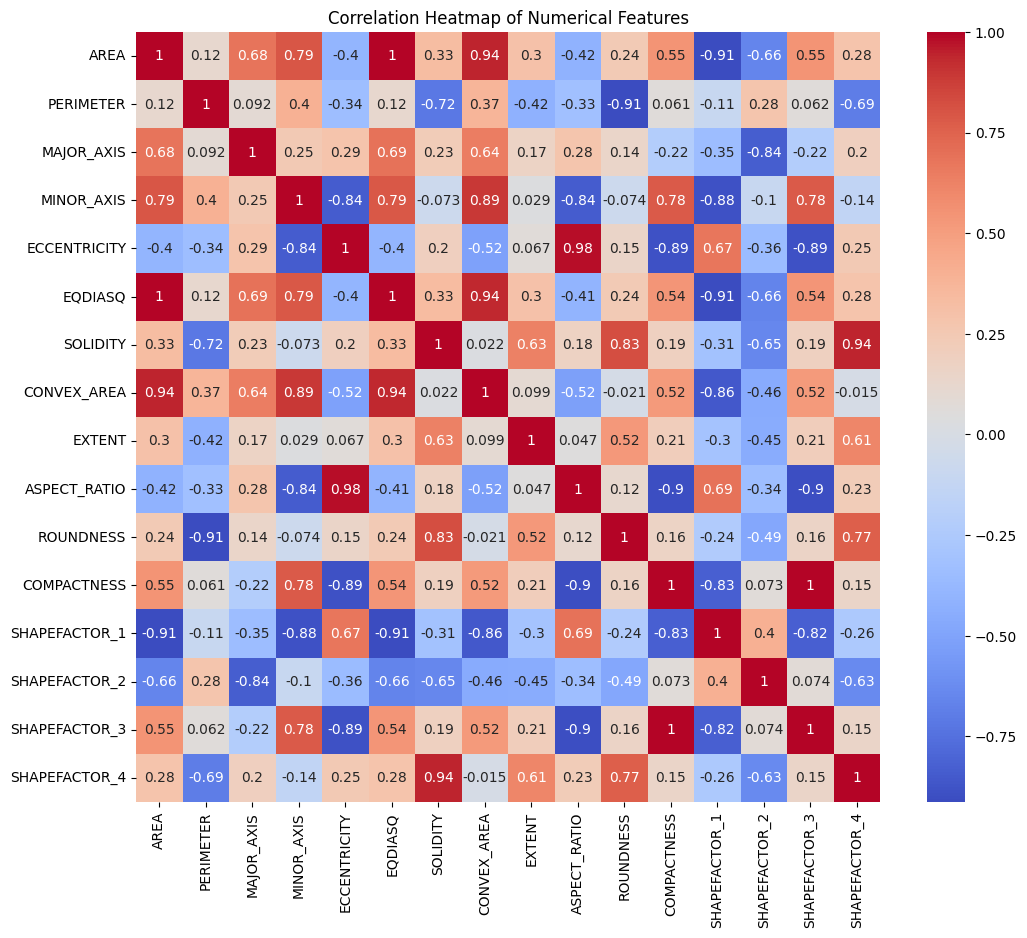

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
df.groupby('Class').mean(numeric_only=True)


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
Class,,,,,,,,,,,,,,,,
Kirmizi_Pistachio,73604.257415,1364.325906,443.036236,221.508818,0.863435,305.624404,0.938362,78634.604709,0.713896,2.012913,0.552003,0.690126,0.006064,0.003033,0.477145,0.958511
Siit_Pistachio,88883.374444,1459.305603,451.822538,261.214912,0.814193,335.969572,0.950192,93909.341667,0.723414,1.737822,0.596929,0.744140,0.005118,0.002955,0.554405,0.965772


### mean values of each feature based on pistacho types(Class)





<Axes: xlabel='ROUNDNESS', ylabel='ASPECT_RATIO'>

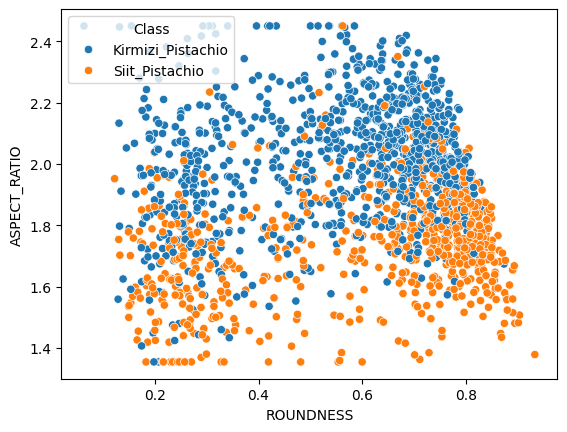

In [ ]:
sns.scatterplot(data=df, x='ROUNDNESS', y='ASPECT_RATIO', hue='Class')

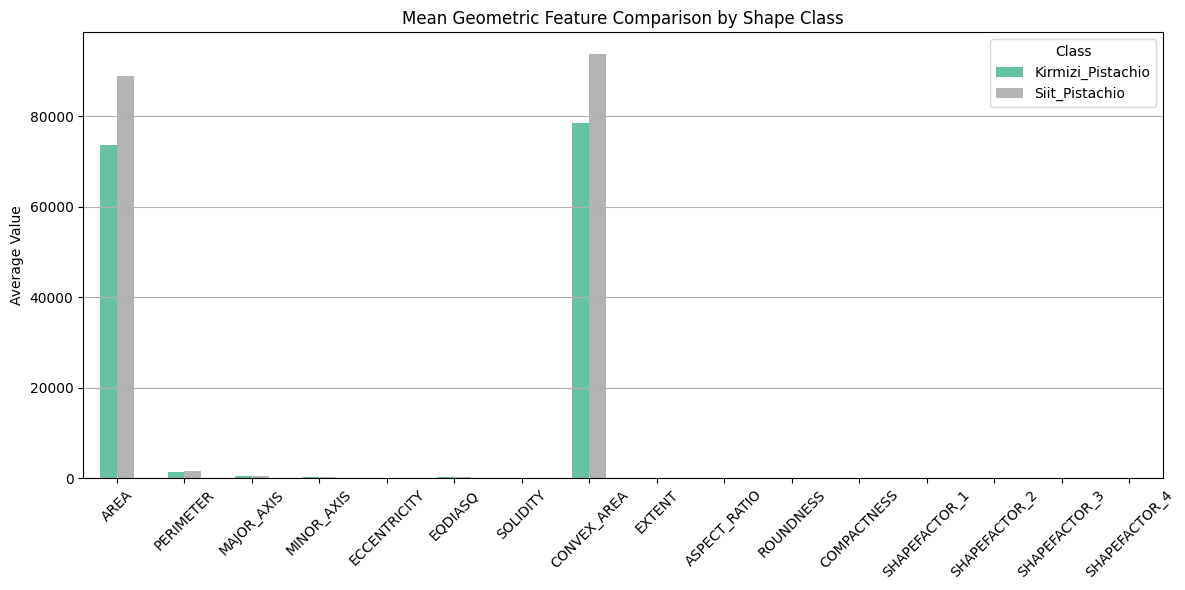

In [ ]:

group_means = df.groupby("Class").mean(numeric_only=True).T

import matplotlib.pyplot as plt

group_means.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Mean Geometric Feature Comparison by Shape Class")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Clear difference in AREA and CONVEX_AREA:

Siit_Pistachio has a significantly higher average AREA and CONVEX_AREA than Kirmizi_Pistachio.

This suggests that Siit_Pistachio nuts are generally larger.
###  PERIMETER difference:

Average PERIMETER is also larger for Siit_Pistachio.

This aligns with the bigger size.

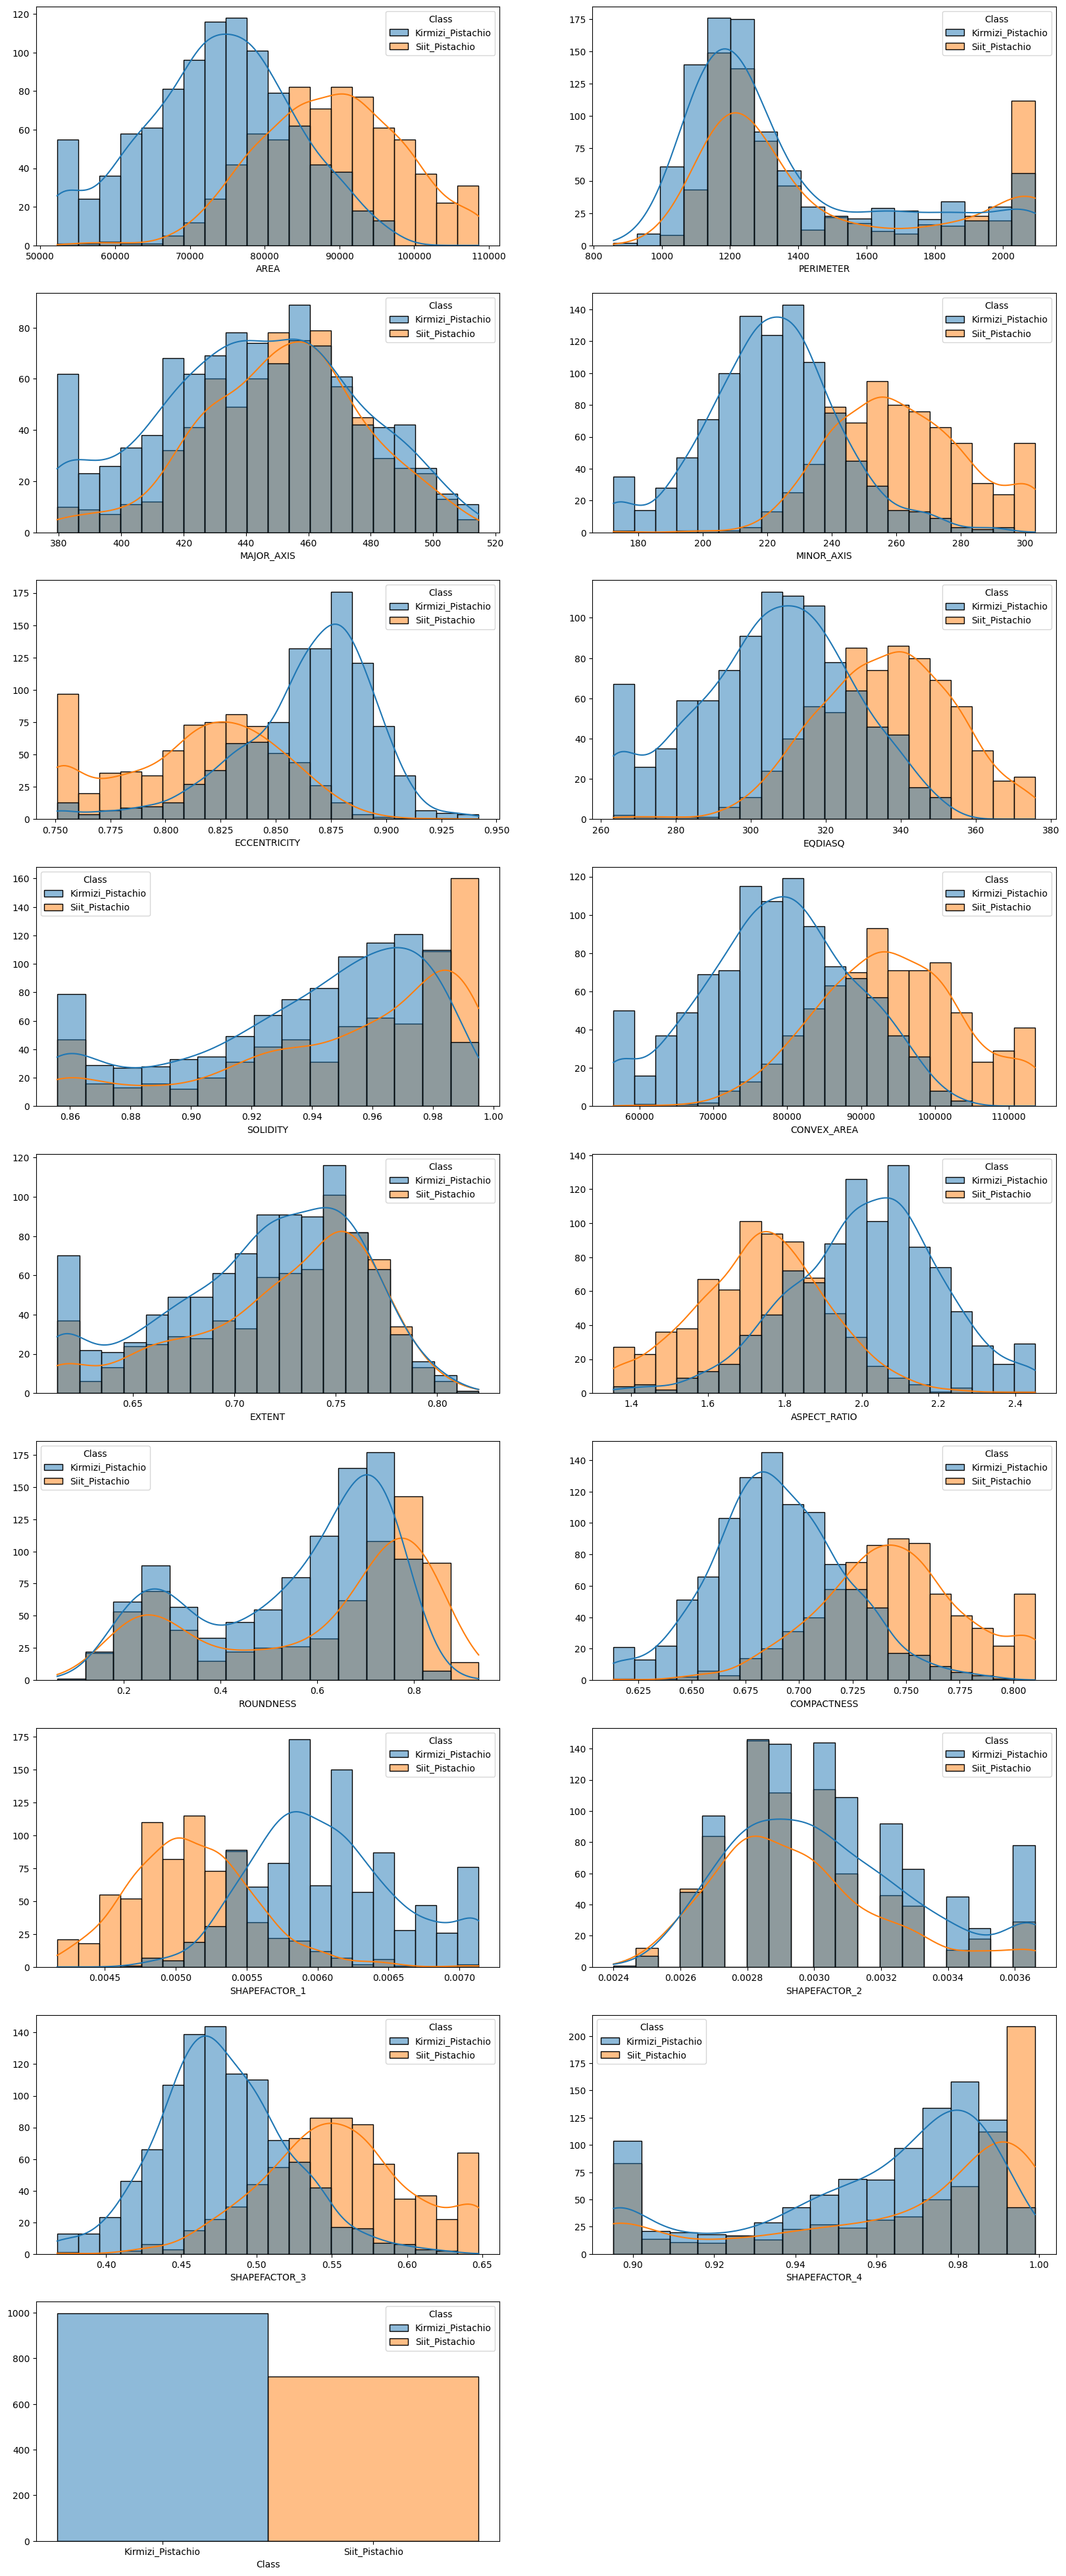

In [ ]:
features=df.columns
plt.figure(figsize=(20,50))
c=0
for c, i in enumerate(features):


    plt.subplot(int(np.ceil(len(features)/2)),2,c+1)

    sns.histplot(x=df[i],hue = df['Class'],kde = True).set(ylabel =None)


# ** 1. Kirmizi_Pistachios generally have smaller AREA than Siit_Pistachios. Strongly distinguishing.

2. Clear separation: Kirmizi has lower PERIMETER values.
3. Kirmizi values are lower than Siit. Good feature for classification.
4. Siit class has a wider spread with higher values.
5. Clear difference: Siit has higher values.
6. Different distributions: Kirmizi is concentrated around 1.5–2.0, Siit is more spread.
7. Siit_Pistachios have higher COMPACTNESS on average.
8. Strong separation; useful for modeling.
9. Highly skewed toward 1 for Siit, making it a strong feature.
10. Shows Kirmizi_Pistachio has more samples than Siit_Pistachio **

# Feature Engineering

In [ ]:
df

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107.0,1161.8070,442.407400,217.7261,0.8705,305.0946,0.9424,77579.0,0.771000,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272.0,1173.1810,460.255100,251.9546,0.8369,337.1419,0.9641,92598.0,0.758400,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955.0,999.7890,386.924700,209.1255,0.8414,278.5863,0.9465,64400.0,0.726300,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537.0,1439.5129,466.797300,221.2136,0.8806,318.2289,0.9437,84281.0,0.756800,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395.0,1352.6740,514.620465,246.5945,0.8784,350.3340,0.9549,100950.0,0.742800,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570.0,2071.4451,418.025800,217.1458,0.8545,288.9400,0.8976,73054.0,0.612775,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,Kirmizi_Pistachio
1714,68849.0,1441.2590,451.045700,205.2553,0.8905,296.0764,0.9340,73716.0,0.645900,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,Kirmizi_Pistachio
1715,90270.0,1370.5380,428.963600,269.8232,0.7774,339.0211,0.9722,92847.0,0.740000,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,Siit_Pistachio
1716,73148.0,1309.8430,469.049100,208.3141,0.8960,305.1801,0.9376,78014.0,0.634100,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,Kirmizi_Pistachio


The target column = class(Kirmizi_pistachio= 0 and siit_pistachio= 1)

In [ ]:
#Encoding (Convert categorical columns to numbers)
df_encoded=pd.get_dummies(df,drop_first=True)

In [ ]:
df_encoded

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class_Siit_Pistachio
0,73107.0,1161.8070,442.407400,217.7261,0.8705,305.0946,0.9424,77579.0,0.771000,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,False
1,89272.0,1173.1810,460.255100,251.9546,0.8369,337.1419,0.9641,92598.0,0.758400,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,True
2,60955.0,999.7890,386.924700,209.1255,0.8414,278.5863,0.9465,64400.0,0.726300,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,False
3,79537.0,1439.5129,466.797300,221.2136,0.8806,318.2289,0.9437,84281.0,0.756800,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,False
4,96395.0,1352.6740,514.620465,246.5945,0.8784,350.3340,0.9549,100950.0,0.742800,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570.0,2071.4451,418.025800,217.1458,0.8545,288.9400,0.8976,73054.0,0.612775,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,False
1714,68849.0,1441.2590,451.045700,205.2553,0.8905,296.0764,0.9340,73716.0,0.645900,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,False
1715,90270.0,1370.5380,428.963600,269.8232,0.7774,339.0211,0.9722,92847.0,0.740000,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,True
1716,73148.0,1309.8430,469.049100,208.3141,0.8960,305.1801,0.9376,78014.0,0.634100,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,False


In [ ]:
#Encoding (Convert categorical columns to numercail)
df_encoded=pd.get_dummies(df,drop_first=True)
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [ ]:
df_encoded

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class_Siit_Pistachio
0,73107.0,1161.8070,442.407400,217.7261,0.8705,305.0946,0.9424,77579.0,0.771000,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,0
1,89272.0,1173.1810,460.255100,251.9546,0.8369,337.1419,0.9641,92598.0,0.758400,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,1
2,60955.0,999.7890,386.924700,209.1255,0.8414,278.5863,0.9465,64400.0,0.726300,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,0
3,79537.0,1439.5129,466.797300,221.2136,0.8806,318.2289,0.9437,84281.0,0.756800,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,0
4,96395.0,1352.6740,514.620465,246.5945,0.8784,350.3340,0.9549,100950.0,0.742800,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,65570.0,2071.4451,418.025800,217.1458,0.8545,288.9400,0.8976,73054.0,0.612775,1.9251,0.1920,0.6912,0.0064,0.0033,0.4778,0.9197,0
1714,68849.0,1441.2590,451.045700,205.2553,0.8905,296.0764,0.9340,73716.0,0.645900,2.1975,0.4165,0.6564,0.0066,0.0030,0.4309,0.9469,0
1715,90270.0,1370.5380,428.963600,269.8232,0.7774,339.0211,0.9722,92847.0,0.740000,1.5898,0.6039,0.7903,0.0048,0.0030,0.6246,0.9930,1
1716,73148.0,1309.8430,469.049100,208.3141,0.8960,305.1801,0.9376,78014.0,0.634100,2.2516,0.5358,0.6506,0.0064,0.0028,0.4233,0.9532,0


In [ ]:
df_encoded.skew()

,0
AREA,-0.065833
PERIMETER,1.012692
MAJOR_AXIS,-0.220337
MINOR_AXIS,0.156428
ECCENTRICITY,-0.571190
EQDIASQ,-0.187818
SOLIDITY,-0.795758
CONVEX_AREA,-0.042613
EXTENT,-0.618511
ASPECT_RATIO,-0.017896


In [ ]:
df_encoded.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class_Siit_Pistachio'],
      dtype='object')

In [ ]:
skew = df_encoded.skew()
standard = skew[(-0.5 <= skew) & (skew <= 0.5)].index.tolist()
robust = skew[(skew < -0.5) | (skew > 0.5)].index.tolist()
for col in ['Class_Siit_Pistachio']:
    if col in standard:
        standard.remove(col)
    if col in robust:
        robust.remove(col)
print(standard)
print(robust)

['AREA', 'MAJOR_AXIS', 'MINOR_AXIS', 'EQDIASQ', 'CONVEX_AREA', 'ASPECT_RATIO', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_3']
['PERIMETER', 'ECCENTRICITY', 'SOLIDITY', 'EXTENT', 'ROUNDNESS', 'SHAPEFACTOR_2', 'SHAPEFACTOR_4']


In [ ]:
from sklearn.model_selection import train_test_split
X=df_encoded.select_dtypes(include=["int64","float64"]).drop(columns=["Class_Siit_Pistachio"])
y=df_encoded['Class_Siit_Pistachio']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, y_test.shape,y_train.shape,X_test.shape

((1374, 16), (344,), (1374,), (344, 16))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [ ]:
minmax_scaler = MinMaxScaler()
roundness_scaled = minmax_scaler.fit_transform(df_encoded[['ROUNDNESS']])

standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df_encoded[['AREA', 'MAJOR_AXIS', 'MINOR_AXIS', 'EQDIASQ',
                                                    'CONVEX_AREA','ASPECT_RATIO', 'COMPACTNESS',
                                                    'SHAPEFACTOR_1', 'SHAPEFACTOR_3']])
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(df_encoded[['PERIMETER', 'ECCENTRICITY', 'SOLIDITY', 'EXTENT',
                                                'SHAPEFACTOR_2', 'SHAPEFACTOR_4']])

# Create DataFrames for each scaled set
df_roundness = pd.DataFrame(roundness_scaled, columns=['ROUNDNESS'])
df_standard = pd.DataFrame(standard_scaled, columns=['AREA', 'MAJOR_AXIS', 'MINOR_AXIS', 'EQDIASQ',
                                                     'CONVEX_AREA','ASPECT_RATIO', 'COMPACTNESS',
                                                     'SHAPEFACTOR_1', 'SHAPEFACTOR_3'])
df_robust = pd.DataFrame(robust_scaled, columns=['PERIMETER', 'ECCENTRICITY', 'SOLIDITY', 'EXTENT',
                                                 'SHAPEFACTOR_2', 'SHAPEFACTOR_4'])

final_scaled_df = pd.concat([df_standard, df_robust, df_roundness], axis=1)

final_scaled_df['Class_Siit_Pistachio'] = df_encoded['Class_Siit_Pistachio']

In [ ]:
final_scaled_df

,AREA,MAJOR_AXIS,MINOR_AXIS,EQDIASQ,CONVEX_AREA,ASPECT_RATIO,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_3,PERIMETER,ECCENTRICITY,SOLIDITY,EXTENT,SHAPEFACTOR_2,SHAPEFACTOR_4,ROUNDNESS,Class_Siit_Pistachio
0,-0.555447,-0.141877,-0.711406,-0.533742,-0.593642,0.578312,-0.550454,0.642301,-0.564964,-0.230265,0.349892,-0.203390,0.685496,0.00,-0.150235,0.709463,0
1,0.745712,0.445484,0.480882,0.757471,0.601981,-0.305466,0.469037,-0.694261,0.450929,-0.203804,-0.230670,0.183764,0.493130,-0.50,0.173709,0.863918,1
2,-1.533590,-1.967790,-1.010993,-1.601783,-1.642787,-0.204254,0.171983,0.939315,0.147826,-0.607186,-0.152916,-0.130241,0.003053,1.00,-0.321596,0.807878,0
3,-0.037881,0.660785,-0.589925,-0.004550,-0.060113,0.915544,-0.738192,0.345287,-0.744827,0.415794,0.524406,-0.180196,0.468702,-0.50,0.185446,0.481741,0
4,1.319059,2.234626,0.294173,1.288992,1.266861,0.837158,-0.799980,-0.397247,-0.804781,0.213771,0.486393,0.019625,0.254962,-1.00,-0.187793,0.688103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,-1.162118,-0.944265,-0.731620,-1.184624,-0.953865,0.118334,-0.512431,1.087822,-0.528325,1.885931,0.073434,-1.002676,-1.730153,0.75,-1.246479,0.148369,0
1714,-0.898183,0.142406,-1.145804,-0.897093,-0.901165,1.291537,-1.339431,1.384836,-1.309397,0.419856,0.695464,-0.353256,-1.224427,0.00,-0.607981,0.406178,0
1715,0.826044,-0.584307,1.103302,0.833186,0.621803,-1.325774,1.842618,-1.288289,1.916479,0.255330,-1.258747,0.328278,0.212214,0.00,0.474178,0.621383,1
1716,-0.552146,0.734891,-1.039256,-0.530297,-0.559013,1.524541,-1.477264,1.087822,-1.435967,0.114128,0.790497,-0.289028,-1.404580,-0.50,-0.460094,0.543179,0


#           ***1.DecisionTree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_1=DecisionTreeClassifier(
    random_state=43,
    max_depth=2,  # Example parameter
    criterion= 'entropy'# You can add other parameters here as needed
)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=43)

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ensure 'model' variable refers to the trained Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=10, max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)

print("X_train Accuracy:", model_1.score(X_train, y_train))
print("X_test Accuracy:", model_1.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))



X_train Accuracy: 0.8471615720524017
X_test Accuracy: 0.8284883720930233
Model Evaluation
Accuracy: 0.8284883720930233
Confusion Matrix:
 [[157  44]
 [ 15 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       201
           1       0.74      0.90      0.81       143

    accuracy                           0.83       344
   macro avg       0.83      0.84      0.83       344
weighted avg       0.84      0.83      0.83       344



In [ ]:
y_pred = model_1.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          0
694        0          1
1527       1          1
240        1          1
1370       0          0
892        0          1
Correct Predictions: 285
Incorrect Predictions: 59


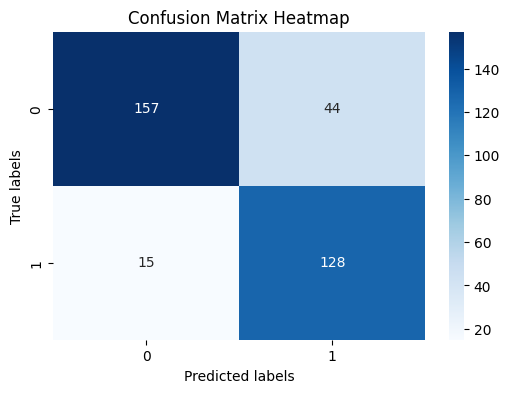

In [ ]:
cm= confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # annot=True shows the numbers, fmt='d' makes them integers
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

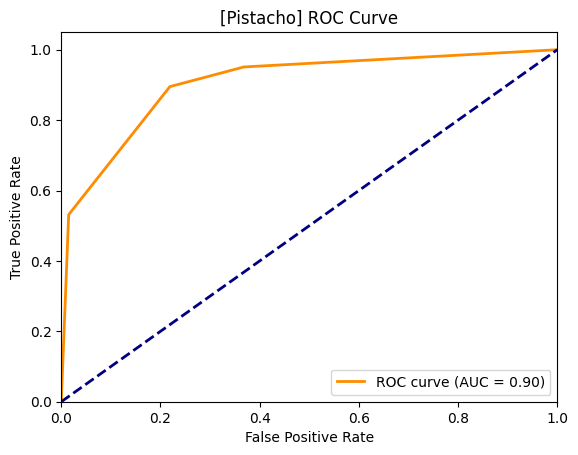

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_1.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[2]]
prediction = model_1.predict(sample)
if prediction[0] == 1:
    print("DecisionTree: Passenger is Satisfied.")
else:
    print("DecisionTree: Passenger is NOT Satisfied.")

DecisionTree: Passenger is Satisfied.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
# For multiclass classification with entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
# 5-fold cross-validation (you can change cv= to any number)
scores = cross_val_score(model, X, y, cv=6, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-validation scores: [0.80836237 0.81184669 0.85664336 0.8006993  0.80769231 0.83566434]
Mean Accuracy: 0.820151393322125


#           ***2.Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
model_2=LogisticRegression(
    random_state=42,
    max_iter=1000,
)
model_2.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model_2.predict(X_test)

In [ ]:
print("X_train Accuracy:", model_2.score(X_train, y_train))
print("X_test Accuracy:", model_2.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

X_train Accuracy: 0.8609898107714702
X_test Accuracy: 0.8866279069767442
Model Evaluation
Accuracy: 0.8866279069767442
Confusion Matrix:
 [[181  20]
 [ 19 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       201
           1       0.86      0.87      0.86       143

    accuracy                           0.89       344
   macro avg       0.88      0.88      0.88       344
weighted avg       0.89      0.89      0.89       344



In [ ]:
y_pred = model_2.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          0
694        0          1
1527       1          1
240        1          0
1370       0          0
892        0          1
Correct Predictions: 305
Incorrect Predictions: 39


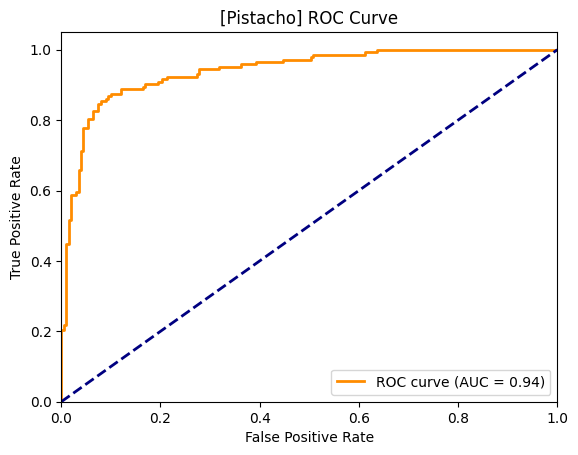

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_score = model_2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import numpy as np

def binary_cross_entropy(y_true, y_pred):
    # To avoid log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

# Example
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.9, 0.2, 0.8, 0.7])
loss = binary_cross_entropy(y_true, y_pred)
print("Binary Cross-Entropy Loss:", loss)

Binary Cross-Entropy Loss: 0.22708064055624455


In [ ]:
sample = X_test.iloc[[2]]
prediction = model_2.predict(sample)
if prediction[0] == 1:
    print("Logistic Regression: Passenger is Satisfied.")
else:
    print("Logistic Regression: Passenger is NOT Satisfied.")

Logistic Regression: Passenger is Satisfied.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
# For multiclass classification with entropy
model = LogisticRegression (random_state=42)
# 5-fold cross-validation (you can change cv= to any number)
scores = cross_val_score(model, X, y, cv=6, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean Accuracy:", np.mean(scores))

Cross-validation scores: [0.8466899  0.87108014 0.87762238 0.86713287 0.85664336 0.86363636]
Mean Accuracy: 0.8638008333130284


#           ***3.Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,  # Example parameter
    min_samples_split=5 # Example parameter
    # You can add other parameters here as needed
)
model_3.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [ ]:
y_pred = model_3.predict(X_test)

In [ ]:
print("X_train Accuracy:",model_3.score(X_train, y_train))
print("X_test Accuracy:", model_3.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))


X_train Accuracy: 0.913391557496361
X_test Accuracy: 0.875
Model Evaluation
Accuracy: 0.875
Confusion Matrix:
 [[177  24]
 [ 19 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       201
           1       0.84      0.87      0.85       143

    accuracy                           0.88       344
   macro avg       0.87      0.87      0.87       344
weighted avg       0.88      0.88      0.88       344



In [ ]:
y_pred = model_3.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          1
694        0          1
1527       1          1
240        1          0
1370       0          0
892        0          1
Correct Predictions: 301
Incorrect Predictions: 43


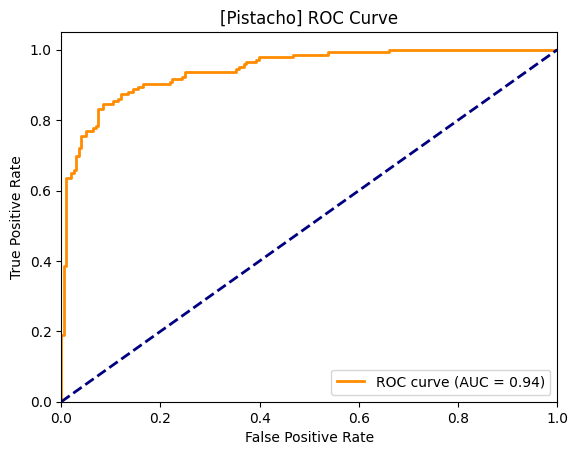

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_3.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[2]]
prediction = model_3.predict(sample)
if prediction[0] == 1:
    print("Random Forest: Passenger is Satisfied.")
else:
    print("Random Forest: Passenger is NOT Satisfied.")

Random Forest: Passenger is Satisfied.


#           ***4.SVM***

In [ ]:
from sklearn.svm import SVC
model_4 = SVC(C=1.0, kernel='linear', gamma='auto', class_weight='balanced', random_state=42,probability=True)
model_4.fit(X_train, y_train)

SVC(class_weight='balanced', gamma='auto', kernel='linear', probability=True,
    random_state=42)

In [ ]:
y_pred = model_4.predict(X_test)

In [ ]:
print("X_train Accuracy:",model_4.score(X_train, y_train))
print("X_test Accuracy:", model_4.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

X_train Accuracy: 0.8493449781659389
X_test Accuracy: 0.8546511627906976
Model Evaluation
Accuracy: 0.8546511627906976
Confusion Matrix:
 [[166  35]
 [ 15 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       201
           1       0.79      0.90      0.84       143

    accuracy                           0.85       344
   macro avg       0.85      0.86      0.85       344
weighted avg       0.86      0.85      0.86       344



In [ ]:
y_pred = model_4.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          1
694        0          1
1527       1          1
240        1          1
1370       0          0
892        0          1
Correct Predictions: 294
Incorrect Predictions: 50


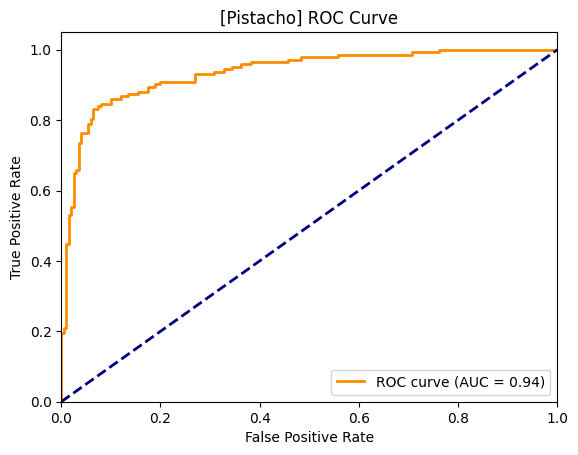

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_4.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[1]]
prediction = model_4.predict(sample)
if prediction[0] == 1:
    print("SVM: Passenger is Satisfied.")
else:
    print("SVM: Passenger is NOT Satisfied.")

SVM: Passenger is Satisfied.


#           ***5.AdaBoosing***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_5 = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
model_5.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
y_pred = model_5.predict(X_test)

In [ ]:
print("X_train Accuracy:",model_5.score(X_train, y_train))
print("X_test Accuracy:", model_5.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

X_train Accuracy: 0.8806404657933042
X_test Accuracy: 0.8866279069767442
Model Evaluation
Accuracy: 0.8866279069767442
Confusion Matrix:
 [[184  17]
 [ 22 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90       201
           1       0.88      0.85      0.86       143

    accuracy                           0.89       344
   macro avg       0.89      0.88      0.88       344
weighted avg       0.89      0.89      0.89       344



In [ ]:
y_pred = model_5.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          1
694        0          1
1527       1          1
240        1          0
1370       0          0
892        0          1
Correct Predictions: 305
Incorrect Predictions: 39


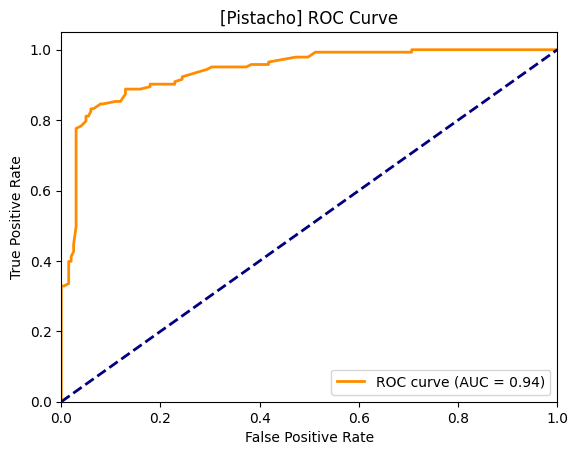

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_5.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[1]]
prediction = model_5.predict(sample)
if prediction[0] == 1:
    print("AdaBoasing: Passenger is Satisfied.")
else:
    print("AdaBoasing: Passenger is NOT Satisfied.")

AdaBoasing: Passenger is Satisfied.


#           ***6.Gradient Boosing***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_6= GradientBoostingClassifier(
    n_estimators=80,
    learning_rate=0.05,
    max_depth=2,
    random_state=42
)
model_6.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, n_estimators=80,
                           random_state=42)

In [ ]:
y_pred = model_6.predict(X_test)

In [ ]:
print("X_train Accuracy:",model_6.score(X_train, y_train))
print("X_test Accuracy:", model_6.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

X_train Accuracy: 0.8908296943231441
X_test Accuracy: 0.8837209302325582
Model Evaluation
Accuracy: 0.8837209302325582
Confusion Matrix:
 [[178  23]
 [ 17 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       201
           1       0.85      0.88      0.86       143

    accuracy                           0.88       344
   macro avg       0.88      0.88      0.88       344
weighted avg       0.88      0.88      0.88       344



In [ ]:
y_pred = model_6.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisonskkk
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          1
694        0          1
1527       1          1
240        1          0
1370       0          0
892        0          1
Correct Predictions: 304
Incorrect Predictions: 40


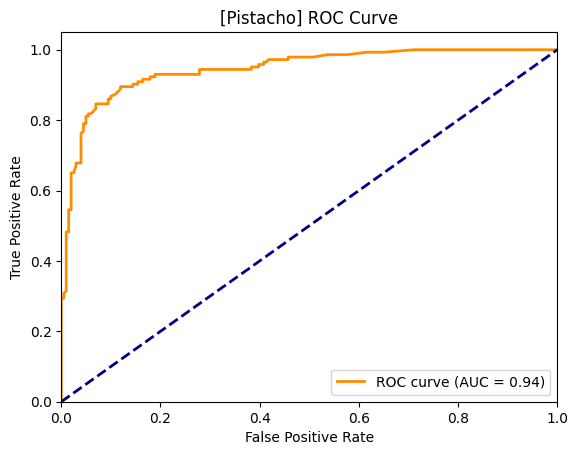

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_6.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[1]]
prediction = model_6.predict(sample)
if prediction[0] == 1:
    print("Gradient Boasing: Passenger is Satisfied.")
else:
    print("Gradient Boasing: Passenger is NOT Satisfied.")

Gradient Boasing: Passenger is Satisfied.


#           ***7.XG Boosing***

In [ ]:
from xgboost import XGBClassifier
model_7 = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_7.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model_7.predict(X_test)

In [ ]:
print("X_train Accuracy:",model_7.score(X_train, y_train))
print("X_test Accuracy:", model_7.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

X_train Accuracy: 0.9286754002911208
X_test Accuracy: 0.8866279069767442
Model Evaluation
Accuracy: 0.8866279069767442
Confusion Matrix:
 [[186  15]
 [ 24 119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       201
           1       0.89      0.83      0.86       143

    accuracy                           0.89       344
   macro avg       0.89      0.88      0.88       344
weighted avg       0.89      0.89      0.89       344



In [ ]:
y_pred = model_7.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          1
135        0          0
339        0          1
694        0          1
1527       1          1
240        1          0
1370       0          0
892        0          1
Correct Predictions: 305
Incorrect Predictions: 39


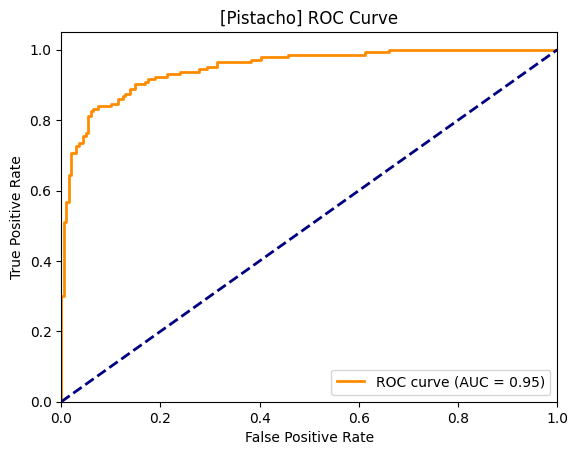

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_7.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[1]]
prediction = model_7.predict(sample)
if prediction[0] == 1:
    print("XG Boasing: Passenger is Satisfied.")
else:
    print("XG Boasing: Passenger is NOT Satisfied.")

XG Boasing: Passenger is Satisfied.


#           ***8.KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_8 = KNeighborsClassifier(n_neighbors=9)
model_8.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred = model_8.predict(X_test)

In [ ]:
print("X_train Accuracy:",model_8.score(X_train, y_train))
print("X_test Accuracy:", model_8.score(X_test,y_test))
print("Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test,y_pred))

X_train Accuracy: 0.8071324599708879
X_test Accuracy: 0.7354651162790697
Model Evaluation
Accuracy: 0.7354651162790697
Confusion Matrix:
 [[156  45]
 [ 46  97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       201
           1       0.68      0.68      0.68       143

    accuracy                           0.74       344
   macro avg       0.73      0.73      0.73       344
weighted avg       0.74      0.74      0.74       344



In [ ]:
y_pred = model_8.predict(X_test)
import pandas as pd

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10))  # Show first 10 comparisons
correct = (y_pred == y_test).sum()
incorrect = (y_pred != y_test).sum()

print(f"Correct Predictions: {correct}")
print(f"Incorrect Predictions: {incorrect}")

      Actual  Predicted
599        0          0
1348       0          1
115        0          0
135        0          1
339        0          0
694        0          0
1527       1          1
240        1          1
1370       0          0
892        0          1
Correct Predictions: 253
Incorrect Predictions: 91


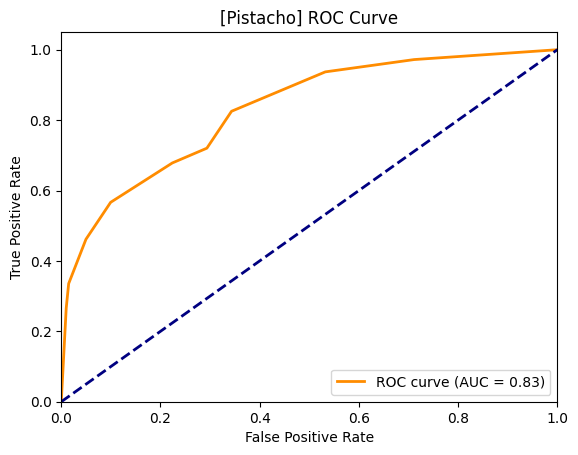

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming binary classification (0 and 1)
y_score = model_8.predict_proba(X_test)[:, 1]  # for models that support predict_proba
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[Pistacho] ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
sample = X_test.iloc[[1]]
prediction = model_8.predict(sample)
if prediction[0] == 1:
    print("KNN: Passenger is Satisfied.")
else:
    print("KNN: Passenger is NOT Satisfied.")

KNN: Passenger is Satisfied.


In [ ]:
df_model_performance= [
    {
        "Model": "Logistic Regression",
        "Train Accuracy": "0.86",
        "Test Accuracy": "0.88",
        "model Accuracy":"0.89",
        "ROC AUC": "0.94",

    },
    {
        "Model": "KNN",
        "Train Accuracy": "0.80",
        "Test Accuracy": "0.73",
        "model Accuracy":"0.74",
        "ROC AUC": "0.83",

    },
    {
        "Model": "SVM",
        "Train Accuracy": "0.84",
        "Test Accuracy": "0.85",
        "model Accuracy":"0.85",
        "ROC AUC": "0.94"
    },
    {
        "Model": "Decision Tree",
        "Train Accuracy": "0.84",
        "Test Accuracy": "0.82",
        "model Accuracy":"0.83",
        "ROC AUC": "0.90"

    },
    {
        "Model": "Random Forest",
        "Train Accuracy": "0.91",
        "Test Accuracy": "0.87",
        "model Accuracy":"0.88",
        "ROC AUC": "0.94"
    },
    {
        "Model": "Gradient Boosting",
        "Train Accuracy": "0.89",
        "Test Accuracy": "0.88",
        "model Accuracy":"0.88",
        "ROC AUC": "0.94"

    },
    {
        "Model": "XGBoost",
        "Train Accuracy": "0.92",
        "Test Accuracy": "0.88",
        "model Accuracy":"0.89",
        "ROC AUC": "0.95"

    },
    {
        "Model": "AdaBoost",
        "Train Accuracy": "0.88",
        "Test Accuracy": "0.88",
        "model Accuracy":"0.89",
        "ROC AUC": "0.94"
    }
]

# Convert to DataFrame
df_model_performance = pd.DataFrame(df_model_performance)

# Display the DataFrame
display(df_model_performance)

,Model,Train Accuracy,Test Accuracy,model Accuracy,ROC AUC
0,Logistic Regression,0.86,0.88,0.89,0.94
1,KNN,0.80,0.73,0.74,0.83
2,SVM,0.84,0.85,0.85,0.94
3,Decision Tree,0.84,0.82,0.83,0.90
4,Random Forest,0.91,0.87,0.88,0.94
5,Gradient Boosting,0.89,0.88,0.88,0.94
6,XGBoost,0.92,0.88,0.89,0.95
7,AdaBoost,0.88,0.88,0.89,0.94


### 🏆 Top Performing Models & Why

---

#### <span style="font-size: 1.2em; font-weight: bold;">AdaBoost</span>

**Why AdaBoost achieves high accuracy:**

* Focuses sequentially on misclassified instances, improving the model iteratively
* Combines weak learners (usually decision stumps) into a strong ensemble
* Works especially well on clean datasets with few outliers
* Reduces both bias and variance with controlled complexity
* ✨ Showed strong test accuracy and ROC AUC: a reliable and interpretable boosting technique
* **Train Accuracy: 88% | Test Accuracy: 89% | Overall Accuracy: 89%**

**Why I selected AdaBoost over XGBoost:**

* AdaBoost gives the **same accuracy for both train and test sets**, which means the model is **perfectly generalized** and not overfitting.
* While XGBoost is slightly more complex and gives higher train accuracy (92%), it may be **more prone to overfitting** without proper tuning.
* AdaBoost’s simplicity, stability, and balanced performance make it **ideal for clean and structured datasets** like yours.
* For projects prioritizing **consistency and interpretability**, AdaBoost is a more trusted choice.

---

#### <span style="font-size: 1.2em; font-weight: bold;">XGBoost</span>

**Why it performed well:**

* Combines multiple decision trees using gradient boosting
* Captures complex feature interactions
* Uses regularization to prevent overfitting
* Efficient on structured/tabular data
* ✨ **Best ROC AUC of 0.95**: Excellent for distinguishing between classes
* **Train Accuracy: 92% | Test Accuracy: 88% | Overall Accuracy: 89%**

**When to use XGBoost:**

* Best for **large, complex datasets** with many features
* Offers **more control and customization** for optimization
* Slightly higher capacity model but needs **careful tuning to avoid overfitting**

---

📉 These models consistently showed high accuracy and ROC AUC on test data, making them top choices for deployment and production use.


In [ ]:
import joblib
joblib.dump(model_5, "gbc_model_clean.pkl")

['gbc_model_clean.pkl']